
# Assignment IV: Advanced CUDA
## [DD2360] Applied GPU Programming
Group 8

Valeria Grotto (vgrotto@kth.se) | Martin Forslund (uz6@kth.se)

***

## EX 2 - CUDA Streams


In [1]:
! git clone https://github.com/MoggmentuM/DD2360.git

Cloning into 'DD2360'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 138 (delta 36), reused 31 (delta 4), pack-reused 0
Receiving objects: 100% (138/138), 486.73 KiB | 4.59 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [42]:
# compile file
! nvcc /content/DD2360/hw_4/ex_2/vectorAdd.cu -o /content/DD2360/hw_4/ex_2/vectorAdd

In [43]:
! ./DD2360/hw_4/ex_2/vectorAdd 10000
! ./DD2360/hw_4/ex_2/vectorAdd 50000
! ./DD2360/hw_4/ex_2/vectorAdd 100000
! ./DD2360/hw_4/ex_2/vectorAdd 500000
! ./DD2360/hw_4/ex_2/vectorAdd 1000000
! ./DD2360/hw_4/ex_2/vectorAdd 5000000
! ./DD2360/hw_4/ex_2/vectorAdd 10000000
! ./DD2360/hw_4/ex_2/vectorAdd 50000000
! ./DD2360/hw_4/ex_2/vectorAdd 100000000

The input length is 10000
vecAdd<<<(313,1), (32,1)>>> elapsed 0.000211 sec
The input length is 50000
vecAdd<<<(1563,1), (32,1)>>> elapsed 0.000401 sec
The input length is 100000
vecAdd<<<(3125,1), (32,1)>>> elapsed 0.000741 sec
The input length is 500000
vecAdd<<<(15625,1), (32,1)>>> elapsed 0.002352 sec
The input length is 1000000
vecAdd<<<(31250,1), (32,1)>>> elapsed 0.004046 sec
The input length is 5000000
vecAdd<<<(156250,1), (32,1)>>> elapsed 0.018286 sec
The input length is 10000000
vecAdd<<<(312500,1), (32,1)>>> elapsed 0.038933 sec
The input length is 50000000
vecAdd<<<(1562500,1), (32,1)>>> elapsed 0.194611 sec
The input length is 100000000
vecAdd<<<(3125000,1), (32,1)>>> elapsed 0.354245 sec


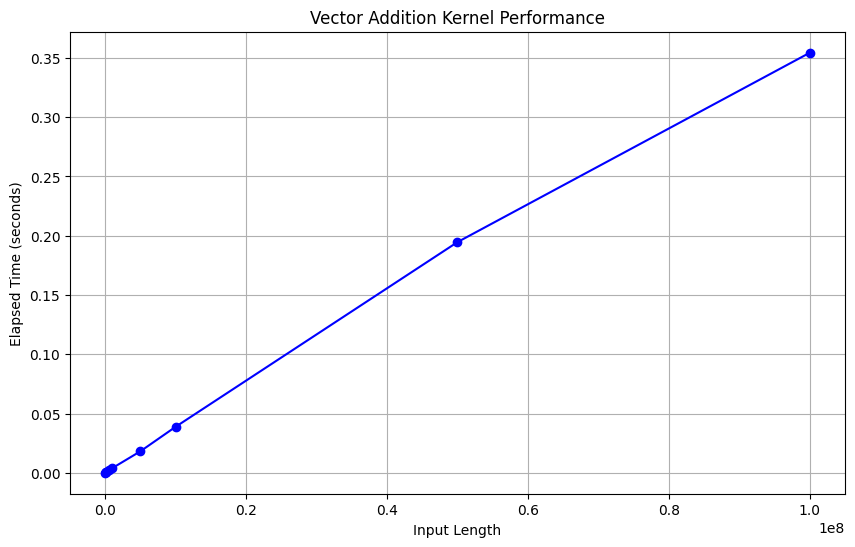

In [44]:
import matplotlib.pyplot as plt

# Input data
input_lengths = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times = [0.000211, 0.000401, 0.000741, 0.002352, 0.004046, 0.018286, 0.038933, 0.194611, 0.354245]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_lengths, elapsed_times, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Vector Addition Kernel Performance')
plt.xlabel('Input Length')
plt.ylabel('Elapsed Time (seconds)')

# Adding grid
plt.grid(True)

# Show plot
plt.show()


### Profiling without streams

In [56]:
# to output file
! nvprof --output-profile /content/DD2360/hw_4/ex_2/output_trace.nvvp -f ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 90000000
==14517== NVPROF is profiling process 14517, command: ./DD2360/hw_4/ex_2/vectorAdd 90000000
vecAdd<<<(2812500,1), (32,1)>>> elapsed 0.322655 sec
==14517== Generated result file: /content/DD2360/hw_4/ex_2/output_trace.nvvp


In [10]:
! nvprof --print-gpu-trace ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 500000
==3031== NVPROF is profiling process 3031, command: ./DD2360/hw_4/ex_2/vectorAdd 500000
vecAdd<<<(15625,1), (32,1)>>> elapsed 0.000000 sec
==3031== Error: Internal profiling error 3959:1.

---------------------------------------------
SUCCESS
======== Profiling result:
   Start  Duration            Grid Size      Block Size     Regs*    SSMem*    DSMem*      Size  Throughput  SrcMemType  DstMemType           Device   Context    Stream  Name
     0ns  852.38us                    -               -         -         -         -  3.8147MB  4.3705GB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
1.1264ms  759.35us                    -               -         -         -         -  3.8147MB  4.9059GB/s    Pageable      Device     Tesla T4 (0)         1         7  [CUDA memcpy HtoD]
1.8988ms  60.992us          (15625 1 1)        (32 1 1)        16        0B        0B         -           -           -           -     Tesla T4 (0)  

**Nvidia Nsight**

In [14]:
! /usr/local/cuda-11/bin/nv-nsight-cu-cli ./DD2360/hw_4/ex_2/vectorAdd 90000000

The input length is 90000000
==PROF== Connected to process 3672 (/content/DD2360/hw_4/ex_2/vectorAdd)
==PROF== Profiling "vecAdd" - 0: 0%....50%....100% - 8 passes
vecAdd<<<(2812500,1), (32,1)>>> elapsed 0.983644 sec

---------------------------------------------
SUCCESS
==PROF== Disconnected from process 3672
[3672] vectorAdd@127.0.0.1
  vecAdd(double *, double *, double *, int), 2023-Dec-10 12:57:32, Context 1, Stream 7
    Section: GPU Speed Of Light Throughput
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         585.20
    Elapsed Cycles                                                                   cycle                      5,618,207
    Memory [%]                             

### With Streams

In [77]:
# compile file
! nvcc /content/DD2360/hw_4/ex_2/vectorAddStream.cu -o /content/DD2360/hw_4/ex_2/vectorAddStream

In [78]:
#run file
! ./DD2360/hw_4/ex_2/vectorAddStream 10000
! ./DD2360/hw_4/ex_2/vectorAddStream 50000
! ./DD2360/hw_4/ex_2/vectorAddStream 100000
! ./DD2360/hw_4/ex_2/vectorAddStream 500000
! ./DD2360/hw_4/ex_2/vectorAddStream 1000000
! ./DD2360/hw_4/ex_2/vectorAddStream 5000000
! ./DD2360/hw_4/ex_2/vectorAddStream 10000000
! ./DD2360/hw_4/ex_2/vectorAddStream 50000000
! ./DD2360/hw_4/ex_2/vectorAddStream 100000000

The input length is 10000
Segment Size: 64, Time: 0.000538 sec
Segment Size: 128, Time: 0.000444 sec
Segment Size: 256, Time: 0.000414 sec
Segment Size: 512, Time: 0.000465 sec

---------------------------------------------
The input length is 50000
Segment Size: 64, Time: 0.000395 sec
Segment Size: 128, Time: 0.000307 sec
Segment Size: 256, Time: 0.000299 sec
Segment Size: 512, Time: 0.000342 sec

---------------------------------------------
The input length is 100000
Segment Size: 64, Time: 0.000366 sec
Segment Size: 128, Time: 0.000367 sec
Segment Size: 256, Time: 0.000317 sec
Segment Size: 512, Time: 0.000341 sec

---------------------------------------------
The input length is 500000
Segment Size: 64, Time: 0.000437 sec
Segment Size: 128, Time: 0.000328 sec
Segment Size: 256, Time: 0.000330 sec
Segment Size: 512, Time: 0.000315 sec

---------------------------------------------
The input length is 1000000
Segment Size: 64, Time: 0.000419 sec
Segment Size: 128, Time: 0.000347 sec

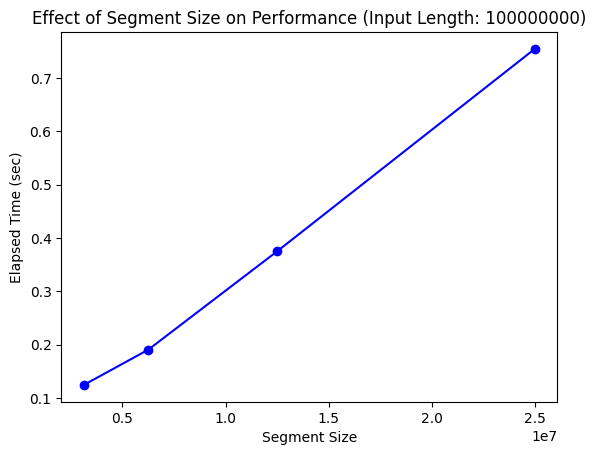

In [70]:
import matplotlib.pyplot as plt

# Input lengths
input_length = 100000000

# Elapsed times for each segment size
segment_sizes = [3125000, 6250000, 12500000, 25000000]
elapsed_times = [0.124387, 0.190406, 0.374908, 0.754635]

# Plotting
plt.plot(segment_sizes, elapsed_times, marker='o', linestyle='-', color='b')

plt.xlabel('Segment Size')
plt.ylabel('Elapsed Time (sec)')
plt.title(f'Effect of Segment Size on Performance (Input Length: {input_length})')
plt.show()


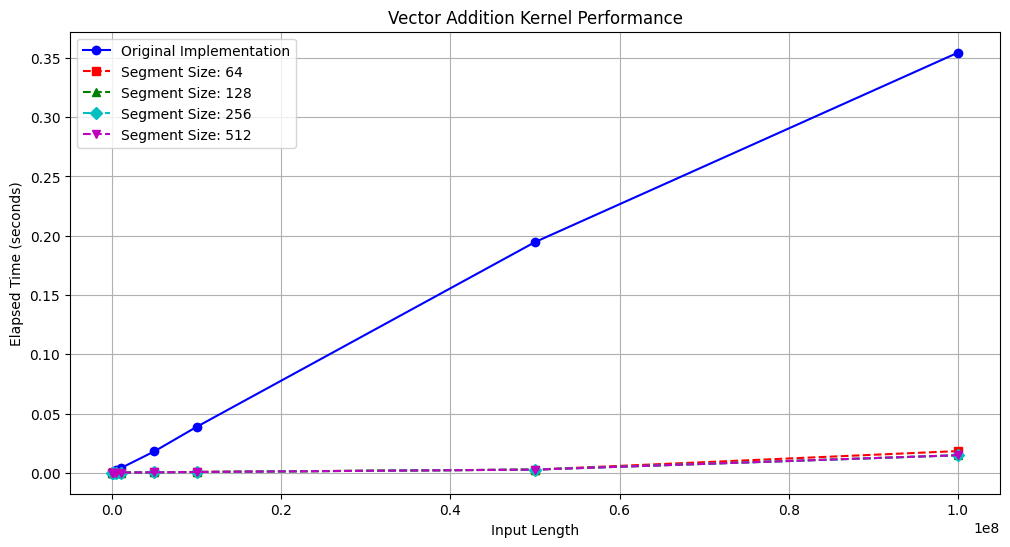

In [55]:
import matplotlib.pyplot as plt

# First set of data
input_lengths = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times = [0.000211, 0.000401, 0.000741, 0.002352, 0.004046, 0.018286, 0.038933, 0.194611, 0.354245]

# Second set of data
input_lengths_segment = [10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000]
elapsed_times_segment_64 = [0.000398, 0.000332, 0.000416, 0.000336, 0.000382, 0.000610, 0.000897, 0.002864, 0.018450]
elapsed_times_segment_128 = [0.000305, 0.000309, 0.000347, 0.000358, 0.000327, 0.000572, 0.000824, 0.002846, 0.014887]
elapsed_times_segment_256 = [0.000303, 0.000343, 0.000338, 0.000329, 0.000314, 0.000545, 0.000803, 0.002853, 0.014952]
elapsed_times_segment_512 = [0.000327, 0.000303, 0.000363, 0.000330, 0.000367, 0.000547, 0.000803, 0.002820, 0.014969]

# Plotting
plt.figure(figsize=(12, 6))

# First line
plt.plot(input_lengths, elapsed_times, marker='o', linestyle='-', color='b', label='Original Implementation')

# Second line (with different segment sizes)
plt.plot(input_lengths_segment, elapsed_times_segment_64, marker='s', linestyle='--', color='r', label='Segment Size: 64')
plt.plot(input_lengths_segment, elapsed_times_segment_128, marker='^', linestyle='--', color='g', label='Segment Size: 128')
plt.plot(input_lengths_segment, elapsed_times_segment_256, marker='D', linestyle='--', color='c', label='Segment Size: 256')
plt.plot(input_lengths_segment, elapsed_times_segment_512, marker='v', linestyle='--', color='m', label='Segment Size: 512')

# Adding labels and title
plt.title('Vector Addition Kernel Performance')
plt.xlabel('Input Length')
plt.ylabel('Elapsed Time (seconds)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [39]:
# to output file
! nvprof --output-profile /content/DD2360/hw_4/ex_2/nvvp_traces/stream_trace.nvvp -f ./DD2360/hw_4/ex_2/vectorAddStream 90000000

The input length is 90000000
==5785== NVPROF is profiling process 5785, command: ./DD2360/hw_4/ex_2/vectorAddStream 90000000
Segment Size: 64, Time: 0.030009 sec
Segment Size: 128, Time: 0.029945 sec
Segment Size: 256, Time: 0.029678 sec
Segment Size: 512, Time: 0.028905 sec

---------------------------------------------
SUCCESS
==5785== Generated result file: /content/DD2360/hw_4/ex_2/nvvp_traces/stream_trace.nvvp


In [54]:
! /usr/local/cuda-11/bin/nv-nsight-cu-cli ./DD2360/hw_4/ex_2/vectorAddStream 90000000

The input length is 90000000
==PROF== Connected to process 13579 (/content/DD2360/hw_4/ex_2/vectorAddStream)
==PROF== Profiling "vecAdd" - 0: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 2: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 3: 0%....50%....100% - 8 passes
Segment Size: 64, Time: 0.738344 sec
==PROF== Profiling "vecAdd" - 4: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 5: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 6: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 7: 0%....50%....100% - 8 passes
Segment Size: 128, Time: 0.567130 sec
==PROF== Profiling "vecAdd" - 8: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 9: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 10: 0%....50%....100% - 8 passes
==PROF== Profiling "vecAdd" - 11: 0%....50%....100% - 8 passes
Segment Size: 256, Time: 0.564523 sec
==PROF== Profiling "vecAdd" - 12